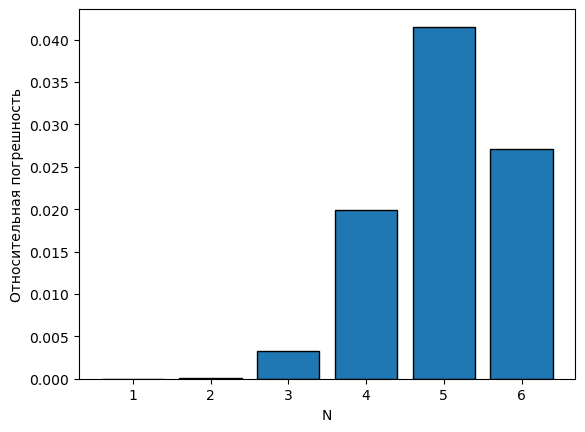

Результаты

Номер m = 4

Вектор относительных погрешностей решений = [6.07655694e-07 1.43070054e-04 3.29189476e-03 1.99160852e-02
 4.15215031e-02 2.71358027e-02]

Относительная погрешность b_m = 0.002380952380952415

Относительная погрешность x_m = 0.041521503132476996

Число обусловленности матрицы А: cond(A) = 3749057081841.856

Относительная погрешность x_m -  0.041521503132476996 <= 8926326385.33788  - произведение числа обусловленности матрицы А и относительной погрешности b_m

delta(x_m) <= cond(A) * delta(b^m)


In [229]:
#Задание №3.1.21
import numpy as np
import matplotlib.pyplot as plt
n = 6
N = 21
c = np.zeros((n,n))
b = np.full(n,fill_value = N,dtype =float)
for i in range(n):
    for j in range(n):
        c[i][j] = 0.1*N*(i+1)*(j+1)
A = 100/(3*c**2+c**3)
x = np.linalg.solve(A,b)
cond = np.linalg.cond(np.abs(A), p = np.inf)

b1 = np.full((n,n),fill_value = N,dtype = float)
delta = 0.05
x1 = np.zeros((n,n))
d = np.zeros(n)
for i in range(n):
    for j in range(n):
        if i == j:
            b1[i][j] += delta
    x1[i] = np.linalg.solve(A,b1[i])
    d[i] = np.linalg.norm(x-x1[i],ord=np.inf)/np.linalg.norm(x,ord=np.inf)

plt.bar(range(1,n+1),d,edgecolor='k')
plt.ylabel('Относительная погрешность')
plt.xlabel('N')
plt.show()

maxd = np.argmax(d)
b2 = b.copy()
b2[maxd] += delta
pogrb = np.linalg.norm(b2 - b, ord=np.inf)/ np.linalg.norm(b, ord=np.inf)
print('Результаты',end='\n\n')
print('Номер m =',maxd,end='\n\n')
print('Вектор относительных погрешностей решений =',d,end='\n\n')
print('Относительная погрешность b_m =',pogrb,end='\n\n')
print('Относительная погрешность x_m =',d[maxd],end='\n\n')
print('Число обусловленности матрицы А: cond(A) =',cond,end='\n\n')
if d[maxd]<=pogrb*cond:
    s = '<='
else:
    s = '>'
print('Относительная погрешность x_m - ',d[maxd],s,pogrb *cond,
      ' - произведение числа обусловленности матрицы А и относительной погрешности b_m',end='\n\n')
print('delta(x_m)',s,'cond(A) * delta(b^m)')

In [220]:
#Задание №3.5.6
def cholesky(A):
    """
    Так как в условии задаччи утверждается, что матрица положительно определена и симметрична,
    то не будем проверять эти условия. Тогда можно применить метод Холецкого (существует L: A=L*L^t).
    Данная функция принимает исходную матрицу A и возвращает матрицу L.
    """
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            S = 0
            if i == j:
                for p in range(j):
                    S += L[j,p]*L[j,p]
                L[i,j] = (A[i,j]-S)**0.5
            else:
                for p in range(j):
                    S +=L[i,p]*L[j,p]
                if L[j,j] == 0:
                    L[i,j] = 0
                else:
                    L[i,j] = (A[i,j]-S)/L[j,j]
    return L

n = 25
m = 10
b_i=i**2-n
A_ij = (i+j)/(m+n)
A_ii = (n+m**2+j/m+i/m)
A = np.zeros((n,n))
b = np.zeros(n)
for i in range(n):
    for j in range(n):
        if i == j:
            A[i][j] = (n+m**2+(j+1)/m+(i+1)/m)
        else:
            A[i][j] = ((i+1)+(j+1))/(m+n)
    b[i] = (i+1)**2-n
L = cholesky(A)
Lt = L.transpose()

y = np.linalg.solve(L,b)
x = np.linalg.solve(Lt,y)
xex=np.linalg.solve(A,b)
pogr = np.linalg.norm(xex - x, ord=np.inf)/ np.linalg.norm(xex, ord=np.inf)

print('Результаты\n\n')
print('Результат решения системы Ly = b\n')
print('y =',y,'\n\n')
print('Результат решения системы (L^t)x = y\n')
print('x =',x,'\n\n')
print('\nРезультат L(L^t) разложения матрицы А\n','L = ',L,'\n\n','L^t =',Lt)



Результаты


Результат решения системы Ly = b

y = [-2.14491002e+00 -1.87383218e+00 -1.42357610e+00 -7.95164062e-01
  1.01083513e-02  9.90681612e-01  2.14474345e+00  3.47024176e+00
  4.96489902e+00  6.62622806e+00  8.45154902e+00  1.04380072e+01
  1.25825915e+01  1.48821540e+01  1.73334289e+01  1.99330521e+01
  2.26775813e+01  2.55635143e+01  2.85873085e+01  3.17453990e+01
  3.50342159e+01  3.84502012e+01  4.19898245e+01  4.56495978e+01
  4.94260893e+01] 


Результат решения системы (L^t)x = y

x = [-0.3528223  -0.33581624 -0.30290358 -0.25413863 -0.18957541 -0.10926773
 -0.01326913  0.09836706  0.22558779  0.36834023  0.52657178  0.70023009
  0.88926304  1.09361875  1.31324558  1.54809209  1.79810712  2.06323969
  2.34343908  2.63865478  2.94883652  3.27393424  3.61389811  3.96867853
  4.3382261 ] 



Результат L(L^t) разложения матрицы А
 L =  [[1.11892806e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0

In [217]:
#Задание 3.6.5

def pivot(A1, b1):
    """
    Вспомогательная функция, для метода Гаусса, перемещающая строки.
    Получает на вход матрицу А и вектор b и возвращающая их же, но уже измененными
    """
    A = A1.copy()
    b = b1.copy()
    n = len(b)  
    for i in range(n):
        max_row = i
        for k in range(i+1,n):
            if abs(A[k][i])>abs(A[max_row][i]):
                max_row = k        
        A[[i,max_row]] = A[[max_row,i]]
        b[[i,max_row]] = b[[max_row,i]]   
    return A, b

def gauss(A1, b1):
    """
    Функция реализующая метод Гаусса с выбором главного элемента по столбцу 
    (схема частичного выбора) для решения системы линейных уравнений.
    Получает на вход матрицу А и вектор b.
    Возвращает решение СЛАУ
    """
    A = A1.copy()
    b = b1.copy()
    n = len(b)    
    for i in range(n):
        A,b = pivot(A, b)        
        for j in range(i+1,n):
            mu = A[j][i] / A[i][i]
            for k in range(i,n):
                A[j][k] -= mu * A[i][k]
            b[j] -= mu * b[i]    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i]-np.dot(A[i][i+1:],x[i+1:]))/A[i][i]    
    return x

def gauss_with_round(A1, b1):
    """
    Та же функция, но на каждой итерации округляются значения до m знаков после запятой
    """
    A = A1.copy()
    b = b1.copy()
    n = len(b)    
    for i in range(n):
        A,b = pivot(A, b)        
        for j in range(i+1,n):
            mu = A[j][i] / A[i][i]
            for k in range(i,n):
                A[j][k] -= new_round(mu * A[i][k],m)
            b[j] -= new_round(mu * b[i],m)    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i]-np.dot(A[i][i+1:],x[i+1:]))/A[i][i]    
    return x

def new_round(par,m):
    """
    Функция реализующая округление числа до m знаков после запятой.
    На вход принимает число и количество знаков, на сколько нужно округлить.
    Возвращает округленное число
    """
    return round(par,m)

M = 5
n = 45
m = 4
q = 0.993+((-1)**M)*M*0.0001
t1,t2,t3 = 0.0001,1,10000
A1,A2,A3 = np.zeros((n,n)),np.zeros((n,n)),np.zeros((n,n))
b = np.zeros(n)
for i in range(n):
    for j in range(n):
        if i == j:
            A1[i][j] = q+t1
            A2[i][j] = q+t2
            A3[i][j] = q+t3
        else:
            A1[i][j] = q
            A2[i][j] = q
            A3[i][j] = q
    b[i] = q**(n+1-i)


Aex = np.array([[10.0,6.0,2.0,0.0],[5.0,1.0,-2.0,4.0],[3.0,5.0,1.0,-1.0],[0.0,6.0,-2.0,2.0]])
bex = np.array([25.0,14.0,10.0,8.0])
print('Результаты\n\n')
print('Проверка правильной работы алгоритма метода Гаусса на примере с семинара\n')
print('Матрица A:',*Aex)
print('Вектор b:',*bex)
print('Результат работы алгоритма:',*gauss(Aex,bex))
#print(gauss(Aex,bex))
x1 = gauss(A1,b)
x2 = gauss(A2,b)
x3 = gauss(A3,b)
print('\n\nРезультаты работы алгоритма для заданных систем:\n\n','x1 =',x1,'\n\n',
     'x2 =',x2,'\n\n','x3 =',x3,'\n')
x1_r = gauss_with_round(A1,b)
x2_r = gauss_with_round(A2,b)
x3_r = gauss_with_round(A3,b)
print('\n\nРезультаты работы алгоритма с произведением округления до m знаков после запятой (m = 4)\n\n')
print('x1 =',x1_r,'\n\n','x2 =',x2_r,'\n\n','x3 =',x3_r,'\n')
pogr1 = np.linalg.norm(x1 - x1_r, ord=np.inf)/ np.linalg.norm(x1, ord=np.inf)
pogr2 = np.linalg.norm(x2 - x2_r, ord=np.inf)/ np.linalg.norm(x2, ord=np.inf)
pogr3 = np.linalg.norm(x3 - x3_r, ord=np.inf)/ np.linalg.norm(x3, ord=np.inf)
print('\n\nОтносительная погрешность при t = 0.0001 равна',pogr1)
print('\n\nОтносительная погрешность при t = 1 равна',pogr2)
print('\n\nОтносительная погрешность при t = 100000 равна',pogr3)
print('\n\nИтого, нетрудно заметить, что при увеличении параметра t погрешность уменьшается:\n')
print('При t = 0.0001, 1, 100000 соответственно:',pogr1,'<',pogr2,'<',pogr3)

Результаты


Проверка правильной работы алгоритма метода Гаусса на примере с семинара

Матрица A: [10.  6.  2.  0.] [ 5.  1. -2.  4.] [ 3.  5.  1. -1.] [ 0.  6. -2.  2.]
Вектор b: 25.0 14.0 10.0 8.0
Результат работы алгоритма: 1.9999999999999993 1.0000000000000002 -0.4999999999999976 0.5000000000000017


Результаты работы алгоритма для заданных систем:

 x1 = [-1313.9704809  -1260.52211179 -1206.66985072 -1152.41064561
 -1097.74142132 -1042.65907946  -987.16049825  -931.24253229
  -874.90201243  -818.13574558  -760.94051448  -703.31307762
  -645.25016893  -586.74849771  -527.80474838  -468.41558028
  -408.57762753  -348.28749883  -287.5417772   -226.3370199
  -164.66975814  -102.53649692   -39.93371483    23.14213615
    86.69463083   150.72737106   215.24398591   280.24813184
   345.74349299   411.7337813    478.22273678   545.21412769
   612.71175077   680.71943145   749.24102408   818.28041213
   887.84150839   957.92825525  1028.54462489  1099.69461949
  1171.38227147  1243.6116437